In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [12]:
df = pd.read_csv(r"C:\Users\bbuser\Desktop\DataScience-Brain-Bytes\Team_members\from_maha\data\student_admission_dataset.csv")

In [13]:
df.head()

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted


In [14]:
df['Admission_Status'] = df['Admission_Status'].map({'Accepted': 1, 'Rejected': 0})

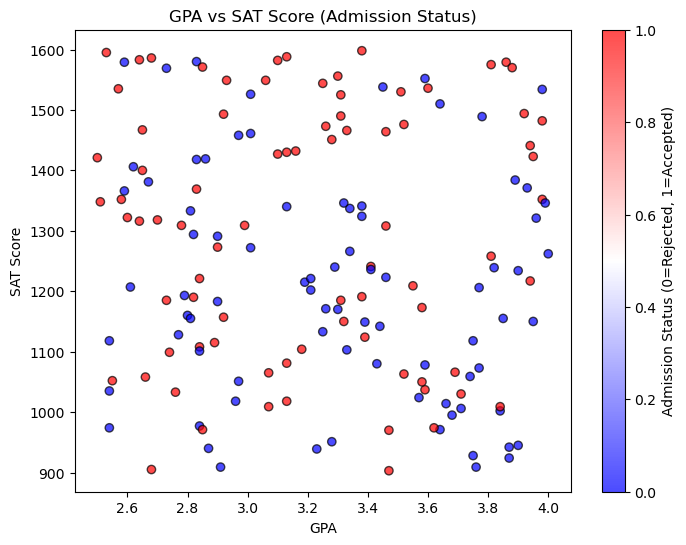

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(df['GPA'], df['SAT_Score'], c=df['Admission_Status'], cmap='bwr', alpha=0.7, edgecolors='k')
plt.xlabel("GPA")
plt.ylabel("SAT Score")
plt.title("GPA vs SAT Score (Admission Status)")
plt.colorbar(label="Admission Status (0=Rejected, 1=Accepted)")
plt.show()

In [16]:
le = LabelEncoder()
df['Admission_Status'] = le.fit_transform(df['Admission_Status'])

In [17]:
y = df["Admission_Status"].astype(str).str.strip().map({"Accepted": 1, "Rejected": 0})

In [18]:
X = df[['GPA', 'SAT_Score', 'Extracurricular_Activities']]
y = df['Admission_Status']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [21]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.34
Confusion matrix:
 [[7 6 5]
 [3 8 3]
 [8 8 2]]
